<a href="https://colab.research.google.com/github/ArushiPatidar/demo/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import pickle

In [ ]:
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
X, Y = mnist["data"], mnist["target"]

In [ ]:
x = X.to_numpy()

In [ ]:
y = Y.to_numpy()

In [ ]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier




In [ ]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [ ]:
X_train_augmented = [image for image in x_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(x_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
y_train_pred = cross_val_predict(knn_clf, X_train_augmented, y_train_augmented, cv=3)

In [ ]:
conf_mx = confusion_matrix(y_train_augmented, y_train_pred)

In [ ]:
conf_mx

array([[29519,    13,     5,     0,     0,    14,    41,     9,     5,
            9],
       [    1, 33629,    20,     1,     4,     0,     8,    36,     3,
            8],
       [   98,   118, 29161,    31,    10,    12,    13,   308,    18,
           21],
       [   13,    34,    67, 30158,     0,   168,     6,    98,    63,
           48],
       [   11,   209,     2,     1, 28570,     2,    27,    31,     4,
          353],
       [   36,    12,    11,   138,     5, 26660,   191,     5,     9,
           38],
       [   59,    42,     2,     1,    20,    47, 29411,     0,     8,
            0],
       [    2,   242,    38,     4,    29,     1,     1, 30859,     6,
          143],
       [   41,   203,    41,   258,    56,   205,   119,    49, 28067,
          216],
       [   59,    54,     6,    90,   183,    34,     5,   216,    19,
        29079]])

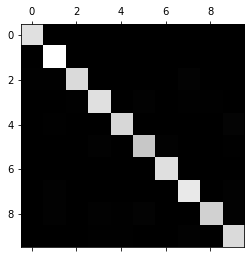

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_augmented,y_train_pred)

0.98371

In [ ]:
knn_clf2 = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf2.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
y_pred = knn_clf2.predict(x_test)
accuracy_score(y_test, y_pred)

0.9763

In [ ]:
pickle.dump(knn_clf2, open('model.pkl', 'wb'))

In [ ]:
## to predict a model >>pickled_model = pickle.load(open('model.pkl', 'rb'))
## pickled_model.predict(X_test)